#I. Загрузка и просмотр набора данных MNIST

In [1]:
import tensorflow.keras.datasets as tf_mnist

(X_train, y_train), (X_test, y_test) = tf_mnist.mnist.load_data()

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


11490434/11490434 [==============================] - 0s 0us/step


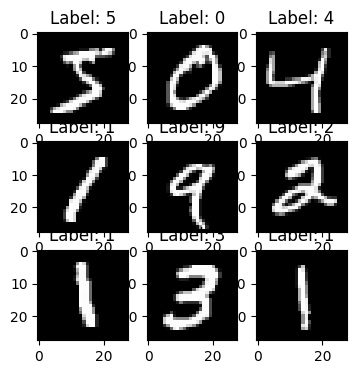

In [4]:
import matplotlib.pyplot as plt

# Afficher quelques exemples d'images
fig, axes = plt.subplots(3, 3, figsize=(4, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
plt.show()


# II. Алгоритм PCA

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


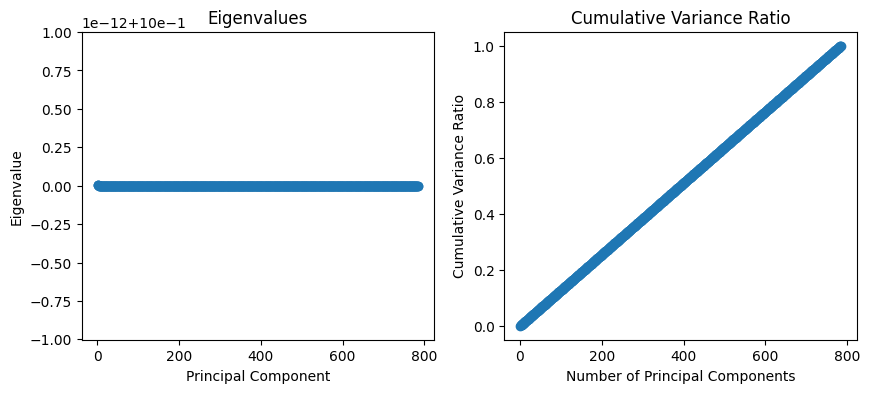

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


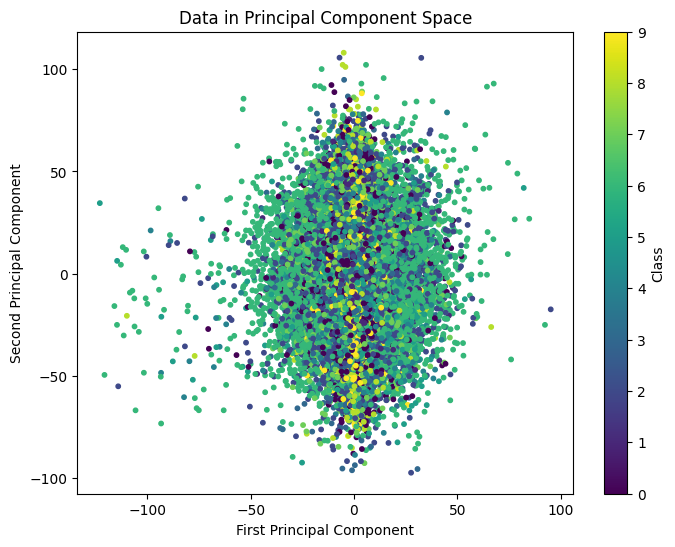

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

class my_PCA():
    def __init__(self, n_components=None):
        self.n_components = n_components

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        self.cov_matrix = np.cov(X_centered, rowvar=False)

        _, self.eigenvectors = np.linalg.eig(self.cov_matrix)
        self.eigenvalues = np.linalg.norm(self.eigenvectors, axis=0) ** 2

        sorted_indices = np.argsort(self.eigenvalues)[::-1]
        self.eigenvalues = self.eigenvalues[sorted_indices]
        self.eigenvectors = self.eigenvectors[:, sorted_indices]

    def transform(self, X):

        X_centered = X - self.mean
        return np.dot(X_centered, self.eigenvectors)

# Loading MNIST data
mnist = fetch_openml('mnist_784', version=1)
X_train, y_train = mnist.data, mnist.target.astype(int)

pca = my_PCA()
pca.fit(X_train)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca.eigenvalues) + 1), pca.eigenvalues, marker='o')
plt.title('Eigenvalues')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.subplot(1, 2, 2)
plt.plot(range(1, len(pca.eigenvalues) + 1), np.cumsum(pca.eigenvalues) / np.sum(pca.eigenvalues), marker='o')
plt.title('Cumulative Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.show()

X_transformed = pca.transform(X_train)
plt.figure(figsize=(8, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_train, cmap='viridis', s=10)
plt.colorbar(label='Class')
plt.title('Data in Principal Component Space')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


# III. алгоритм kNN

Accuracy of the kNN algorithm with 5 neighbors: 1.0
Best accuracy on the test set: 1.0
Number of principal components: 1
Number of neighbors: 5


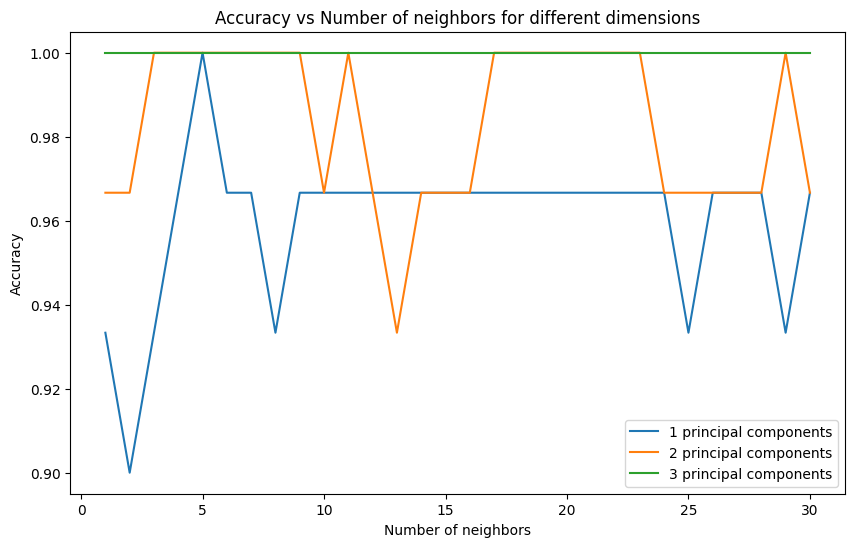

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

class my_kNN:
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.n_neighbors]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            prediction = max(set(k_nearest_labels), key=k_nearest_labels.count)
            predictions.append(prediction)
        return predictions

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knn_classifier = my_kNN(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the kNN algorithm with 5 neighbors:", accuracy)

best_accuracy = 0
best_n_components = 0
best_n_neighbors = 0

for n_components in range(1, min(5, min(X_train.shape))):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    for n_neighbors in range(1, 31):
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X_train_pca, y_train)
        y_pred = knn.predict(X_test_pca)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_n_components = n_components
            best_n_neighbors = n_neighbors

print("Best accuracy on the test set:", best_accuracy)
print("Number of principal components:", best_n_components)
print("Number of neighbors:", best_n_neighbors)


accuracies = []
for n_components in range(1, min(5, min(X_train.shape))):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    knn_accuracies = []
    for n_neighbors in range(1, 31):
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X_train_pca, y_train)
        y_pred = knn.predict(X_test_pca)
        accuracy = accuracy_score(y_test, y_pred)
        knn_accuracies.append(accuracy)

    accuracies.append(knn_accuracies)

plt.figure(figsize=(10, 6))
for i in range(len(accuracies)):
    plt.plot(range(1, 31), accuracies[i], label=f"{i+1} principal components")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of neighbors for different dimensions")
plt.legend()
plt.show()


## заключение работы

заключение р

Я начал с предварительной обработки данных MNIST, загрузив и разделив их на обучающие и тестовые наборы. Затем я реализовал метод главных компонент (PCA), центрируя данные, вычислив их матрицу ковариации и используя собственные значения для проецирования данных в пространство меньшей размерности.

Затем я проанализировал собственные значения, чтобы понять, какую дисперсию объясняет каждая главная компонента, и использовал кумулятивную дисперсию для выбора оптимального числа компонент. Я визуализировал данные в пространстве двух первых главных компонент для лучшего понимания их структуры.

Затем я реализовал алгоритм k-ближайших соседей (kNN) для классификации рукописных цифр после уменьшения размерности с помощью PCA. Я также оптимизировал параметры, проводя эксперименты с различными значениями числа соседей (k) в kNN и числа компонент в PCA, чтобы достичь более высокой точности классификации.

В заключение, мой подход позволил сократить сложность данных, сохраняя при этом их существенную информацию, что улучшило производительность модели kNN при классификации рукописных цифр MNIST. Однако точность модели зависит от выбранных параметров и может быть дополнительно оптимизирована для достижения еще более высоких результатов.